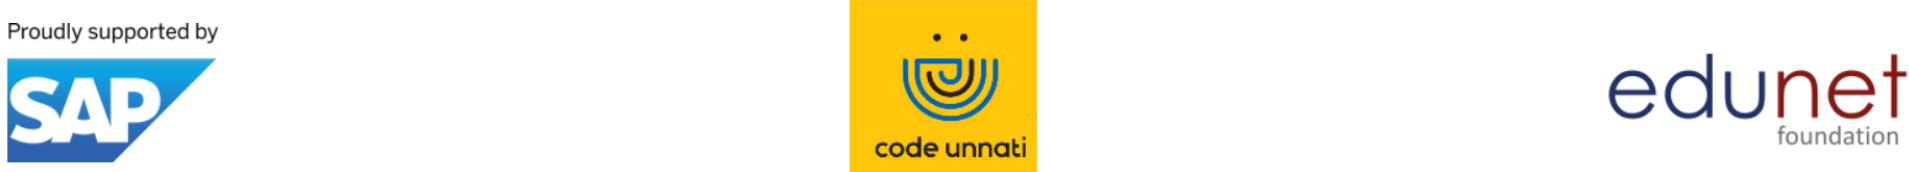

# EDUNET FOUNDATION-Class Exercise Notebook

## LAB 3 - CRUD Operations in MongoDB Using Python

In [ ]:
pip install pymongo 

### Import pymongo

In [1]:
import pymongo

### Creating connection

In [2]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")

In [3]:
myclient.list_database_names()

['admin',
 'car_db',
 'code_unnati',
 'config',
 'employee',
 'infosys_db',
 'local',
 'mydb']

### Accessing specific database

In [4]:
My_db=myclient['car_db']

In [5]:
My_db.stats

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'car_db'), 'stats')

### List all collections inside databas

In [6]:
My_db.list_collection_names()

['car']

### Creating new database and collection in MongoDB

In [11]:
tcs_db=myclient["tcs_db"]

In [12]:
emp_coll=tcs_db['emp_coll']

### However, the database  are not created until you add some content to them. lets fill them with data.

In [13]:
document = {
    "Name":"Aman",
    "Age":25,
    "State":"Gujarat",
    "Profile":"Developer",
    "Salary":55000,
    "Experience":3,
    "Skills":["PHP","MySQL"]   
   }

In [14]:
emp_coll.insert_one(document)

### List all database again 

In [15]:
myclient.list_database_names()

['admin',
 'car_db',
 'code_unnati',
 'config',
 'employee',
 'infosys_db',
 'local',
 'mydb',
 'tcs_db']

you can see that tcs_db database exist in mongodb server

### Inserting Multiple Documents Using insert_many() methods

In [16]:
emp_data= [
    {
    "Name":"Priya",
    "Age":23,
    "State":"Delhi",
    "Profile":"Tester",
    "Salary":35000,
    "Experience":2,
    "Skills":["PHP","MySQL",'Agile','Selenium']   
   },
    {
    "Name":"Karan",
    "Age":24,
    "State":"Punjab",
    "Profile":"Developer",
    "Salary":57000,
    "Experience":3,
    "Skills":["Python","MySQL","MongoDB"]   
   },
    {
    "Name":"Prince",
    "Age":27,
    "State":"Gujarat",
    "Profile":"Developer",
    "Salary":75000,
    "Experience":5,
    "Skills":["Python","MySQL","MongoDB","ML"]   
   }
]

In [17]:
emp=emp_coll.insert_many(emp_data)

### List all collections inside infosys_db database

In [18]:
infosys_db.list_collection_names()

['emp_coll']

In [19]:
#Accessing Collection 
emp_coll=tcs_db['emp_coll']

### Reading Documents

In [20]:
results=emp_coll.find()

In [21]:
results

In [22]:
for data in results:
    print(data)

{'_id': ObjectId('665173d637fbc4f59a42926c'), 'Name': 'Aman', 'Age': 25, 'State': 'Gujarat', 'Profile': 'Developer', 'Salary': 55000, 'Experience': 3, 'Skills': ['PHP', 'MySQL']}
{'_id': ObjectId('6651745f37fbc4f59a42926d'), 'Name': 'Priya', 'Age': 23, 'State': 'Delhi', 'Profile': 'Tester', 'Salary': 35000, 'Experience': 2, 'Skills': ['PHP', 'MySQL', 'Agile', 'Selenium']}
{'_id': ObjectId('6651745f37fbc4f59a42926e'), 'Name': 'Karan', 'Age': 24, 'State': 'Punjab', 'Profile': 'Developer', 'Salary': 57000, 'Experience': 3, 'Skills': ['Python', 'MySQL', 'MongoDB']}
{'_id': ObjectId('6651745f37fbc4f59a42926f'), 'Name': 'Prince', 'Age': 27, 'State': 'Gujarat', 'Profile': 'Developer', 'Salary': 75000, 'Experience': 5, 'Skills': ['Python', 'MySQL', 'MongoDB', 'ML']}


### Reading Specific One document

In [23]:
emp_coll.find_one()

{'_id': ObjectId('665173d637fbc4f59a42926c'),
 'Name': 'Aman',
 'Age': 25,
 'State': 'Gujarat',
 'Profile': 'Developer',
 'Salary': 55000,
 'Experience': 3,
 'Skills': ['PHP', 'MySQL']}

### Querying Specific Document


In [24]:
emp_coll.find_one({"Name":"Karan"})

{'_id': ObjectId('6651745f37fbc4f59a42926e'),
 'Name': 'Karan',
 'Age': 24,
 'State': 'Punjab',
 'Profile': 'Developer',
 'Salary': 57000,
 'Experience': 3,
 'Skills': ['Python', 'MySQL', 'MongoDB']}

In [25]:
results2=emp_coll.find({"State":"Gujarat"})

In [26]:
results2

In [27]:
for data in results2:
    print(data)

{'_id': ObjectId('665173d637fbc4f59a42926c'), 'Name': 'Aman', 'Age': 25, 'State': 'Gujarat', 'Profile': 'Developer', 'Salary': 55000, 'Experience': 3, 'Skills': ['PHP', 'MySQL']}
{'_id': ObjectId('6651745f37fbc4f59a42926f'), 'Name': 'Prince', 'Age': 27, 'State': 'Gujarat', 'Profile': 'Developer', 'Salary': 75000, 'Experience': 5, 'Skills': ['Python', 'MySQL', 'MongoDB', 'ML']}


### Updating Document

In [28]:
emp_coll.update_many({"Profile":"Developer"},{"$set":{"Profile":"Web Application Developer"}})

In [29]:
update_results=emp_coll.find()

In [30]:
for data in update_results:
    print(data)

{'_id': ObjectId('665173d637fbc4f59a42926c'), 'Name': 'Aman', 'Age': 25, 'State': 'Gujarat', 'Profile': 'Web Application Developer', 'Salary': 55000, 'Experience': 3, 'Skills': ['PHP', 'MySQL']}
{'_id': ObjectId('6651745f37fbc4f59a42926d'), 'Name': 'Priya', 'Age': 23, 'State': 'Delhi', 'Profile': 'Tester', 'Salary': 35000, 'Experience': 2, 'Skills': ['PHP', 'MySQL', 'Agile', 'Selenium']}
{'_id': ObjectId('6651745f37fbc4f59a42926e'), 'Name': 'Karan', 'Age': 24, 'State': 'Punjab', 'Profile': 'Web Application Developer', 'Salary': 57000, 'Experience': 3, 'Skills': ['Python', 'MySQL', 'MongoDB']}
{'_id': ObjectId('6651745f37fbc4f59a42926f'), 'Name': 'Prince', 'Age': 27, 'State': 'Gujarat', 'Profile': 'Web Application Developer', 'Salary': 75000, 'Experience': 5, 'Skills': ['Python', 'MySQL', 'MongoDB', 'ML']}


### Deleting Documents

In [31]:
emp_coll.delete_many({"Name":"Aman"})

In [32]:
final_results=emp_coll.find()

In [33]:
for data in final_results:
    print(data)

{'_id': ObjectId('6651745f37fbc4f59a42926d'), 'Name': 'Priya', 'Age': 23, 'State': 'Delhi', 'Profile': 'Tester', 'Salary': 35000, 'Experience': 2, 'Skills': ['PHP', 'MySQL', 'Agile', 'Selenium']}
{'_id': ObjectId('6651745f37fbc4f59a42926e'), 'Name': 'Karan', 'Age': 24, 'State': 'Punjab', 'Profile': 'Web Application Developer', 'Salary': 57000, 'Experience': 3, 'Skills': ['Python', 'MySQL', 'MongoDB']}
{'_id': ObjectId('6651745f37fbc4f59a42926f'), 'Name': 'Prince', 'Age': 27, 'State': 'Gujarat', 'Profile': 'Web Application Developer', 'Salary': 75000, 'Experience': 5, 'Skills': ['Python', 'MySQL', 'MongoDB', 'ML']}


### Droping Collection

In [34]:
emp_coll.drop()

In [35]:
tcs_db.list_collection_names()

[]

### Deleting Database

In [36]:
myclient.drop_database("tcs_db")